<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/MID_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peter Phoenix - 2201735413

Machine Learning - LA01

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Proses diatas adalah untuk mengimport seluruh library yang diperlukan dimana 

*   pandas untuk membaca file
*   numpy untuk perhitungan matematika
*   seaborn untuk mem-plot-kan data
*   sklearn.linear_model untuk linear regression (algoritma learning yang digunakan)
*   sklearn metrics untuk menghitung evaluation metrics
*   skelearn.model_selection untuk train_test_split, yaitu untuk membagi dataset untuk testing dan training
*   matplotlib untuk menampilkan plot




1 . Berikut adalah cara untuk membuka data, serta menampilkan data.

In [ ]:
data = pd.read_csv('datasetMidExamCOMP6577.csv')
print(data.head())
print(data.shape)
print(data.dtypes)
print(data.isna().values.any())

         X1        X2        X3  ...       X19       X20           Y
0 -1.642373 -1.891163  1.255130  ...  0.856564  0.109518  -31.739298
1 -0.236370  0.403301  0.226318  ...  0.774001  0.207668   26.899336
2  0.583380 -0.108189 -1.625678  ...  1.251860  0.523639  183.024854
3 -0.806393  0.478986 -0.233436  ... -0.538455 -0.962383  396.679552
4  1.298593  1.326947  0.580294  ...  1.174179  0.501171  387.164191

[5 rows x 21 columns]
(5000, 21)
X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
Y      float64
dtype: object
False


Terlihat bahwa data mempunyai 21 kolom, X1, X2, X3, ..., X20, Y serta memiliki 5000 baris yang dimana setiap kolom memiliki tipe data berupa float64 dan tidak ada data yang kosong (NULL atau NaN).

In [ ]:
print("- Maximum -\n")
print(data.max())

print("\n- Minimum -\n")
print(data.min())

print("\n- Average -\n")
print(data.mean())

print("\n- Summary -\n")
print(data.sum())

print("\n- Count -\n")
print(data.count())

- Maximum -

X1       3.318885
X2       3.839527
X3       3.735288
X4       3.803317
X5       3.425089
X6       3.467728
X7       3.657381
X8       3.506429
X9       3.645761
X10      3.185439
X11      3.249807
X12      3.508102
X13      3.859351
X14      3.650182
X15      3.512230
X16      3.429935
X17      3.362256
X18      3.634935
X19      3.426333
X20      4.162365
Y      740.019221
dtype: float64

- Minimum -

X1      -3.488324
X2      -3.496688
X3      -5.148485
X4      -3.573875
X5      -3.224547
X6      -3.536761
X7      -3.698173
X8      -3.671536
X9      -3.677741
X10     -3.650546
X11     -3.611693
X12     -3.702240
X13     -3.361729
X14     -4.120041
X15     -3.331187
X16     -3.493909
X17     -3.895678
X18     -3.588884
X19     -4.254218
X20     -4.013535
Y     -749.578669
dtype: float64

- Average -

X1     -0.001953
X2     -0.015267
X3      0.022455
X4      0.008668
X5      0.035632
X6      0.013229
X7     -0.000042
X8      0.004030
X9     -0.002143
X10    -0.004591
X11

Diatas merupakan analisis statistik mengenai data, dimana range input adalah -4.254218 - 4.162365 dan range output -749.578669 - 740.019221. Data yang digunakan relatif kecil, sehingga tidak perlu dilakukan normalisasi terlebih dahulu. Pada bagian Count juga terlihat bahwa seluruh kolom memiliki jumlah data yang sama, yaitu 5000.

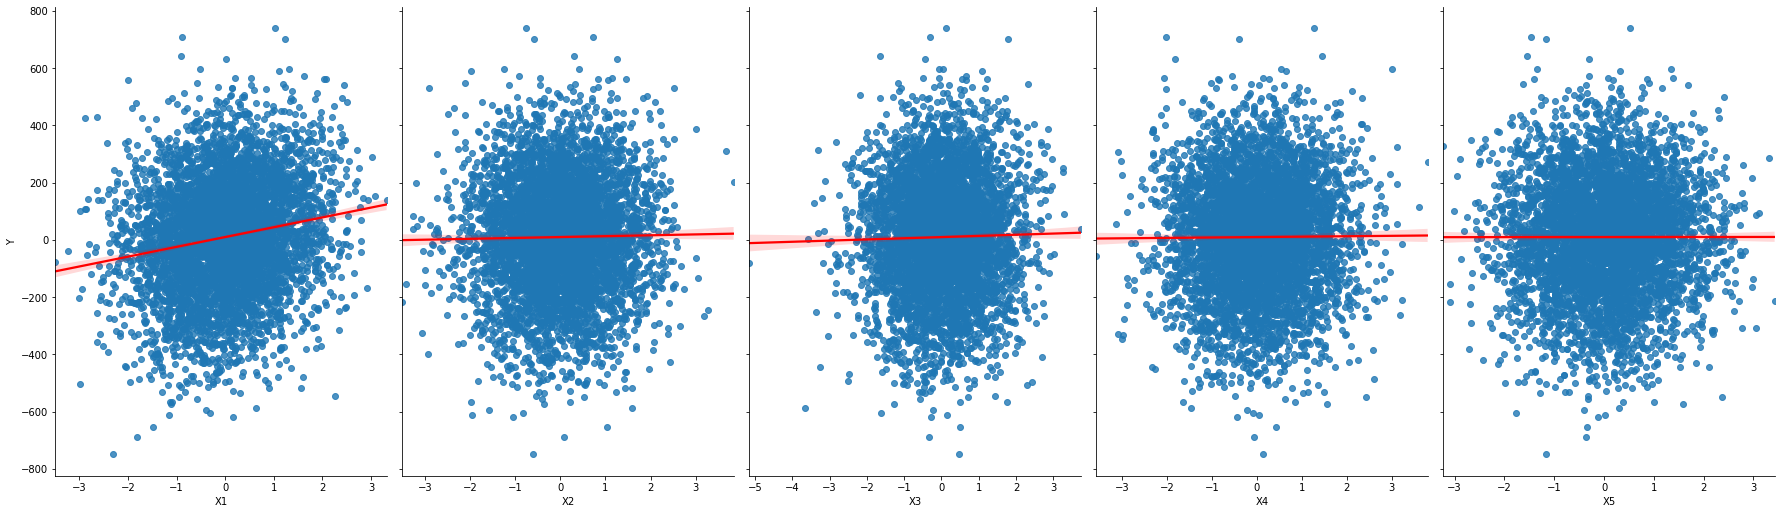

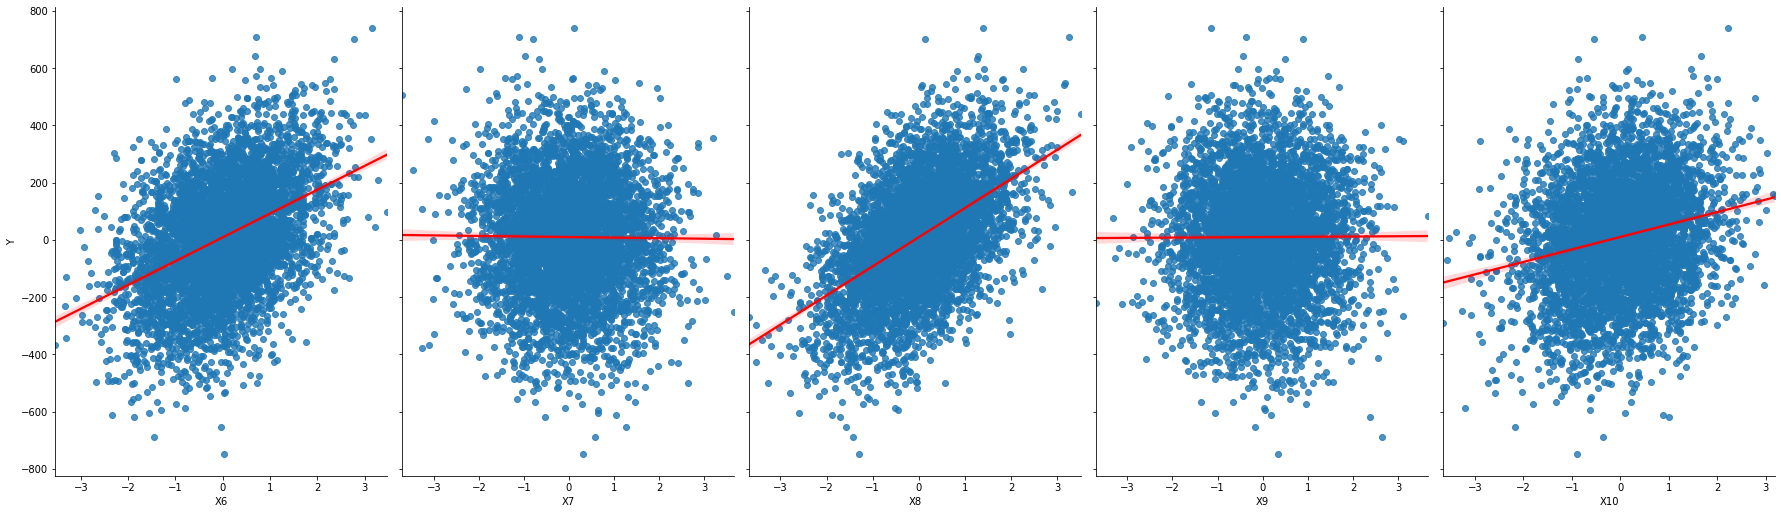

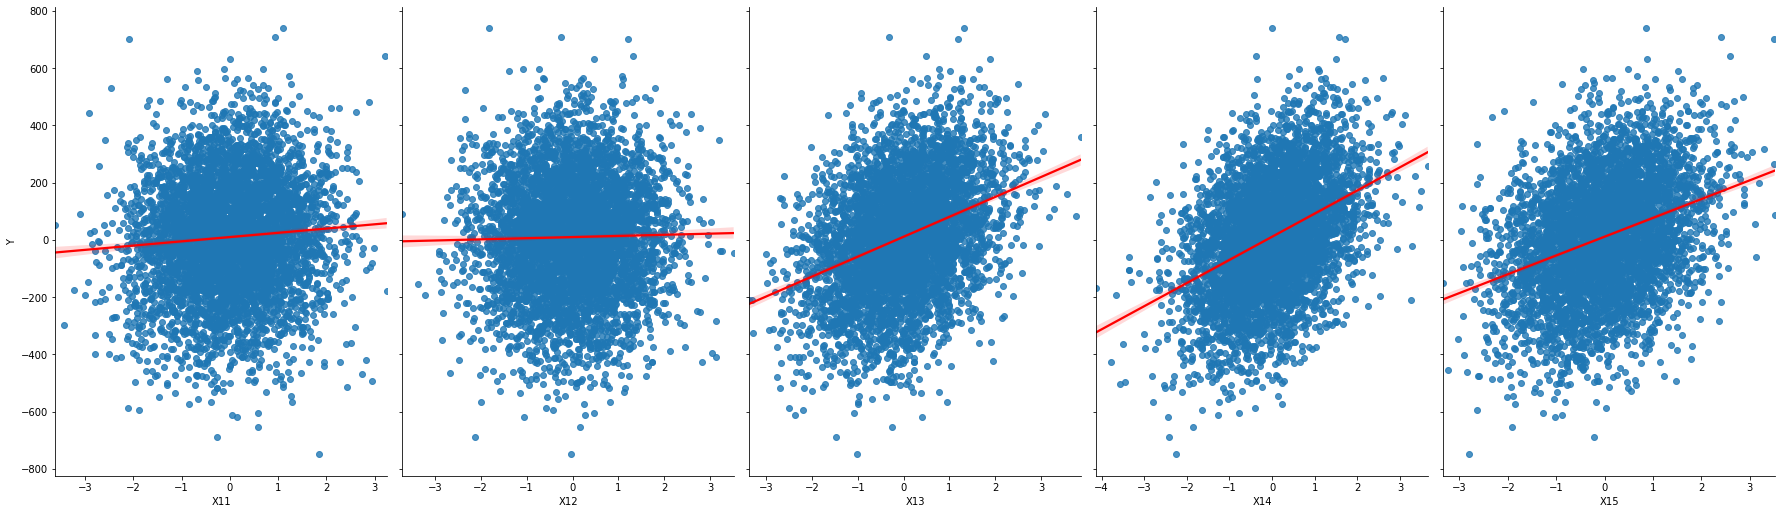

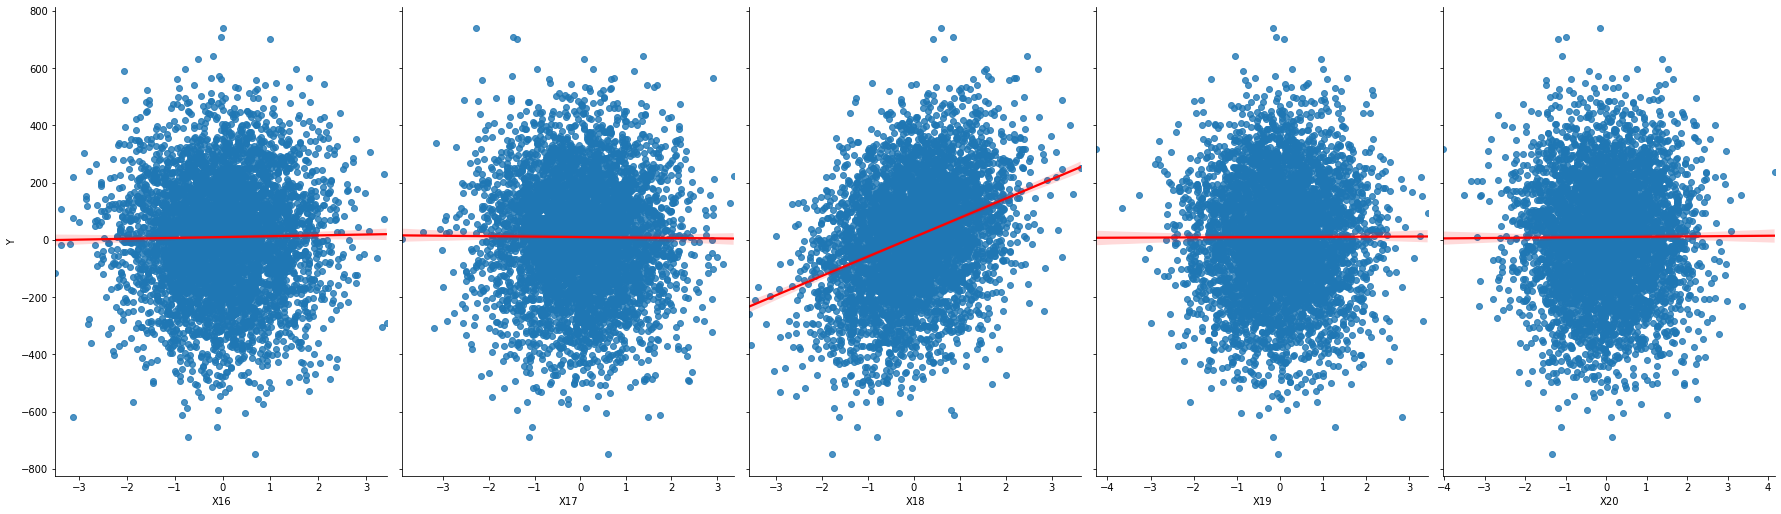

In [ ]:
sb.pairplot(data, x_vars = ['X1', 'X2', 'X3', 'X4', 'X5'], y_vars = ['Y'], height = 7, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
sb.pairplot(data, x_vars = ['X6', 'X7', 'X8', 'X9', 'X10'], y_vars = ['Y'], height = 7, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
sb.pairplot(data, x_vars = ['X11', 'X12', 'X13', 'X14', 'X15'], y_vars = ['Y'], height = 7, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
sb.pairplot(data, x_vars = ['X16', 'X17', 'X18', 'X19', 'X20'], y_vars = ['Y'], height = 7, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})

plt.show()

Persebaran data yang terdapat yang terjadi cukup tidak teratur, ditandai dengan banyaknya grafik yang membentuk lingkaran, dimana dapat diambil kesimpulan bahwa nilai X dan Y kurang bergantung satu sama lain (Nilai X kecil maupun besar tetap menghasilkan Y yang serupa). Data yang baik adalah data yang berbentuk diagonal, dimana sangat terlihat ketergantungannya (Contoh: X8, X14, X18). Dapat dilihat juga garis regressi pada data tersebut, dimana pada banyak data yang memiliki garis lurus secara horizontal, walaupun sebenarnya persebaran datanya tidak demikian, hal ini dikarenakan data terlalu random sehingga tidak dapat diprediksi.

2 . Algoritma learning yang akan digunakan adalah Linear Regression, hal ini dikarenakan data / fitur yang akan digunakan secara umum membentuk garis lurus diagonal. Data yang digunakan juga mendukung untuk digunakannya linear regression karena merupakan supervised learning (terdapat output) yang mana outputnya bersifat kontiniu.

 Linear regression sangat umum digunakan, berjalan dengan cepat, mudah digunakan, dapat diartikan dengan baik dan juga merupakan basis dari banyak metode lainnya.

3 . Fitur yang akan digunakan yaitu: X6, X8, X13, X14, X15, dan X18

 3 A. Fitur-fitur tersebut dipilih dikarenakan grafik pada fitur-fitur ini cukup linear yang menandakan keterkaitan mereka terhadap output. Seluruh fitur yang terpilih disini miring kearah atas kanan, dimana berarti semakin besar X maka Y semakin besar juga.

 3 B. Fitur lainnya tidak dipilih dikarenakan persebaran datanya kurang baik (membentuk lingkaran) sehingga kurang dapat dilihat keterkaitan antara nilai X dengan nilai Y.



In [ ]:
feature_cols = ['X6', 'X8', 'X13', 'X14', 'X15', 'X18']
X = data[feature_cols]
y = data.Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm = LinearRegression()
lm.fit(X_train, y_train)

print("Intercept: ", lm.intercept_)
print("Coefficients X6, X8, X13, X14, X15, X18: ", lm.coef_)

Intercept:  11.567306271030855
Coefficients X6, X8, X13, X14, X15, X18:  [82.6521911  96.2098902  65.66041123 81.72210252 65.50083567 72.03924619]


4 . Learning model dimulai dengan menentukan algoritma learning (nomor 2) kemudian menentukan fitur-fitur yang digunakan (nomor 3). Setelah kedua hal tersebut ditentukan maka kita akan memasukkan fitur yang digunakan pada list X dan output pada list y.

 Langkah selanjutnya yaitu dilakukan train_test_split untuk membagi dataset menjadi training dataset dan testing dataset dimana X_train adalah input untuk training, X_test adalah input untuk testing, y_train adalah output dari X_train, dan y_test adalah output dari X_test.

 Untuk menggunakan linear regression, kita dapat langgung memanggil fungsi LinearRegression().fit(input, output) yang terdapat pada library sklearn.linear_model.

 Secara singkatnya, linear regression mencari garis lurus terbaik untuk merepresentasikan data yang ada, dimana persamaan garis tersebut berupa:
> y = coef1 \* X1 + coef2 \* X2 + coef3 \* X3 + ... + intercept
 
 Dapat dilihat diatas untuk hasil intercept serta koefisien setiap fitur yang didapatkan.

 Untuk mencari output prediksi secara manual dapat menggunakan rumus diatas, dengan koefisien, nilai X, serta intercept disesuaikan.

 Linear regression terus menerus mengupdate koefisien (weight) serta intercept (bias) hingga konvergen dengan cara mencari selisih weight dan bias dengan dengan errornya masing-masing yang sudah dikalikan dengan learning rate. Rumus ini disebut dengan gradient descent. Secara sederhana dapat digambarkan pada rumus berikut:

 > Wnew = Wold - alpha \* ((bias + Wold \* X - T) \* X)

 > Bnew = Bold - alpha \* (bias + Wold \* X - T)

 T adalah target atau output sebenarnya dari W dan B tersebut.


In [ ]:
y_pred = lm.predict(X_test)

print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score                : ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error     :  42.91032041416058
Mean Squared Error      :  2938.5618017602706
Root Mean Squared Error :  54.208503039285915
R2 Score                :  0.9315555780552578


5 . Evaluation metrics:
*   Mean Absolute Error (MAE) adalah rata-rata dari selisih antara actual output dengan predicted output.
*   Mean Squared Error (MSE) adalah rata-rata dari selisih kuadrat antara actual output dengan predicted output.
*   Root Mean Square Error (RMSE) adalah akar dari MSE.
*   R2 Score adalah representasi dari berapa persen prediksi benar yang dilakukan. Secara rumus R2 Score dapat dijelaskan sebagai (total varians pada model) / (total varians).



6 . A. Jika hanya menggunakan 1 fitur terhadap Y akan digunakan fitur X8 karena paling linear dibandingkan yang lainnya. Fitur lain yang dapat dipilih yaitu X14 dan X18 karena pada grafiknya juga cukup baik (terlihat linear).

In [ ]:
feature_cols = ['X8']
X1 = data[feature_cols]
y1 = data.Y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)

print("Intercept: ", lm1.intercept_)
print("Coefficient X8: ", lm1.coef_)

y1_pred = lm1.predict(X1_test)

print("Mean Absolute Error     : ", metrics.mean_absolute_error(y1_test, y1_pred))
print("Mean Squared Error      : ", metrics.mean_squared_error(y1_test, y1_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R2 Score                : ", metrics.r2_score(y1_test, y1_pred))

Intercept:  9.715602596443414
Coefficient X8:  [103.60211869]
Mean Absolute Error     :  138.2969503420932
Mean Squared Error      :  29989.225156814507
Root Mean Squared Error :  173.1739736704523
R2 Score                :  0.24557631110369516


6 . A. Hal yang terjadi pada kasus ini adalah underfitting, dimana data yang digunakan kurang sehingga tidak dapat diprediksi trendnya.

 Dapat dilihat bahwa error yang didapatkan sangatlah besar dan R2 Score yang didapatkan sangatlah kecil.

In [ ]:
feature_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20']
X2 = data[feature_cols]
y2 = data.Y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

print("Intercept: ", lm2.intercept_)
print("Coefficients X1 - X20: ", lm2.coef_)

y2_pred = lm2.predict(X2_test)

print("Mean Absolute Error     : ", metrics.mean_absolute_error(y2_test, y2_pred))
print("Mean Squared Error      : ", metrics.mean_squared_error(y2_test, y2_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R2 Score                : ", metrics.r2_score(y2_test, y2_pred))

Intercept:  11.700828463657889
Coefficients X1 - X20:  [ 3.08048249e+01  5.82256099e-03 -2.84023006e-03  3.88267411e+00
 -3.91146151e-03  8.20095497e+01 -4.11477828e-03  9.73646342e+01
  1.88279948e-03  4.29207444e+01  1.69042896e+01 -3.12403575e-03
  6.53839402e+01  8.11446499e+01  6.43124095e+01 -1.98319015e-03
  5.30788673e-03  7.30118326e+01  1.48049918e-02  2.22621746e-03]
Mean Absolute Error     :  0.39621742531192916
Mean Squared Error      :  0.24603045949359784
Root Mean Squared Error :  0.4960145758882473
R2 Score                :  0.9999936748059756


6 . B. Hal yang terjadi pada kasus ini adalah overfitting, yaitu kebalikan dari underfitting dimana model mengambil terlalu banyak data, bahkan data yang tidak penting sekalipun.
 
 Error yang dihasilkan pada saat overfitting sangatlah kecil dan R2 Score sangat besar, memang sekilas hal ini terlihat baik, namun jika muncul data lain yang jenisnya berbeda dengan data yang digunakan pada saat testing, maka model akan menghasilkan kesalahan dikarenakan oleh data-data yang tidak penting yang diikutkan dalam model.